In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/sample_submission.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/dataset/nlp/sample_submission.csv
/kaggle/input/dataset/nlp/train.csv
/kaggle/input/dataset/nlp/test.csv
/kaggle/input/quora-processed-data/processed_data_wo_index.csv
/kaggle/input/quora-word2vec/processed_data_w0rd2vec.csv


***Buisness Objectives and contraints***

1) Cost of mis-classificaton is very high

2) Use a probability threshold to make the decision so that it can be changed in future

3) No strict latency requirements

4) Interpretability is partially important



To split it in train/test dataset, we should use timestamp in this case because the new questions might be different , so we just need to sort the data as per the timestamp and take old 70% as train and new 30% as test dataset. But we dont have the timestamp present in this dataset so we will do random splitting

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option('display.max_colwidth',100)    #to display the whole question

In [4]:
df = pd.read_csv('../input/dataset/train.csv')
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [6]:
df.sample(10)      # picks up randomly 10 datapoints

,id,qid1,qid2,question1,question2,is_duplicate
16301,16301,31085,25365,What is a 21st century educator?,Is this the 21st Century?,0
30644,30644,56574,56575,Would you ever cheat on your partner?,If you ever have - why did you cheat on your partner?,0
396142,396142,42216,83555,"Who has scored more goals via free kick, Messi or Ronaldo?",Is Lionel Messi currently the best soccer player in the league? Why or why not?,0
196347,196347,297024,297025,Do airline pilots touch every button in the cockpit during a flight?,Do pilots sleep in the cockpit during long flights?,0
258430,258430,302273,374004,Could a Gorilla beat a Tiger/Lion in a fight?,Can a gorilla beat up a lion?,1
104077,104077,76661,171891,How do I prepare for net exam in education?,What is the best way to prepare for NET exam in biotechnology?,0
352745,352745,391313,224105,Do I still have a chance of getting into a good college?,What are my chances of getting into a good college?,0
344285,344285,472486,472487,What is the best VR for Samsung Galaxy J7 Prime?,"Which mobile phone is better out of these three: Moto G4 Plus, Samasung Galaxy J7 Prime Or Samsu...",0
270678,270678,388611,388612,How is the process of hydrolysis described?,How can you describe the process of hydrolysis?,1
82099,82099,139297,139298,Difference between laminar transitional and turbulent flow?,What is a fully developed laminar and turbulent flow?,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate number of rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.08
1    36.92
Name: is_duplicate, dtype: float64


<Axes: >

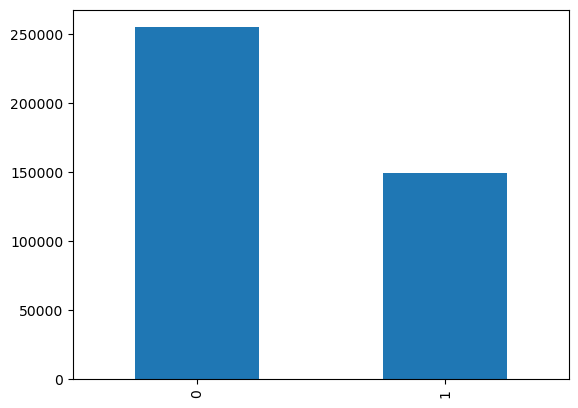

In [10]:
# distribution of duplicate and non-duplicate quesitons

print(df['is_duplicate'].value_counts())
print(round((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100, 2))
df['is_duplicate'].value_counts().plot(kind='bar')

In [11]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("unique questions :",np.unique(qid).shape[0])
x = qid.value_counts()>1
print("repeated questions : ", x[x].shape[0])

unique questions : 537933
repeated questions :  111780


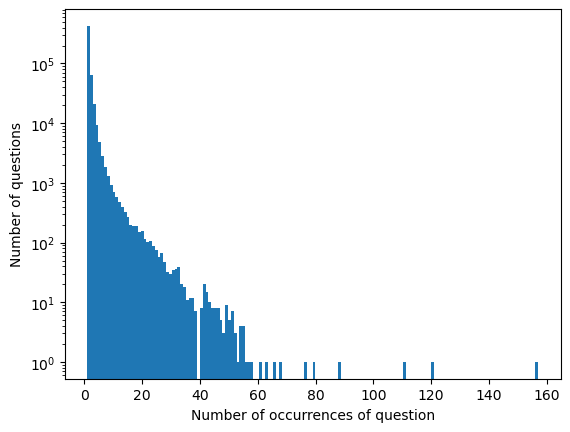

In [12]:
# repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.xlabel('Number of occurrences of question')
plt.ylabel('Number of questions')
plt.yscale('log')
plt.show()

In [13]:
#checking for Nan values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                                                                  question2  \
105780                                                                                                  NaN   
201841                                                                                                  NaN   
363362  My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronoun...   

        is_duplicate  
105780             0  
201841             0  
363362             0  


/tmp/ipykernel_23/2679301262.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


In [14]:
df = df.fillna(' ')
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


/tmp/ipykernel_23/648104289.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


Feature Engineering

- freq_qid1 = frequency of qid 1
- freq_qid2
- q1len
- q2len
- q1words
- q2words
- words common : # of common unique words
- words total : total words in q1 + total words in q2 (unique)
- word share : (word common) / (word total)
- freq_q1 + freq_q2
- freq_q1 - freq_q2

In [15]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda x: len(x.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda x: len(x.split(" ")))

def common_words(row):
    l1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    l2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return 1.0 * len(l1&l2)

df['word_common'] = df.apply(common_words, axis=1)

def total_words(row):
    t1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    t2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return 1.0 * (len(t1) + len(t2))

df['word_total'] = df.apply(total_words, axis=1)

df['word_share'] = round(df['word_common']/df['word_total'],2)

df['freq_q1+q2'] = df['freq_qid1'] + df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1'] - df['freq_qid2'])

df.to_csv("basic_feature_engineering_train.csv", index = False)

df.head()


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [16]:
df.describe()

,id,qid1,qid2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
count,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198,2.827609,3.046961,59.536711,60.108370,10.944594,11.185125,4.511610,21.126112,0.223347,5.874570,1.845715
std,116708.614503,157751.700002,159903.182629,0.482588,4.487418,6.026871,29.940650,33.863862,5.431944,6.311069,3.098656,8.592622,0.128243,9.091068,5.187882
min,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000,1.000000,1.000000,39.000000,39.000000,7.000000,7.000000,2.000000,15.000000,0.120000,2.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000,1.000000,1.000000,52.000000,51.000000,10.000000,10.000000,4.000000,19.000000,0.220000,3.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000,3.000000,2.000000,72.000000,72.000000,13.000000,13.000000,6.000000,25.000000,0.320000,5.000000,2.000000
max,404289.000000,537932.000000,537933.000000,1.000000,50.000000,120.000000,623.000000,1169.000000,125.000000,237.000000,41.000000,166.000000,0.500000,157.000000,119.000000


In [17]:
print("Number of quesitons with minimum length [quesiton 1] : ",df[df['q1_n_words']==1].shape[0])

Number of quesitons with minimum length [quesiton 1] :  66


/tmp/ipykernel_23/1325670420.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non_duplicate')
/tmp/ipykernel_23/1325670420.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')


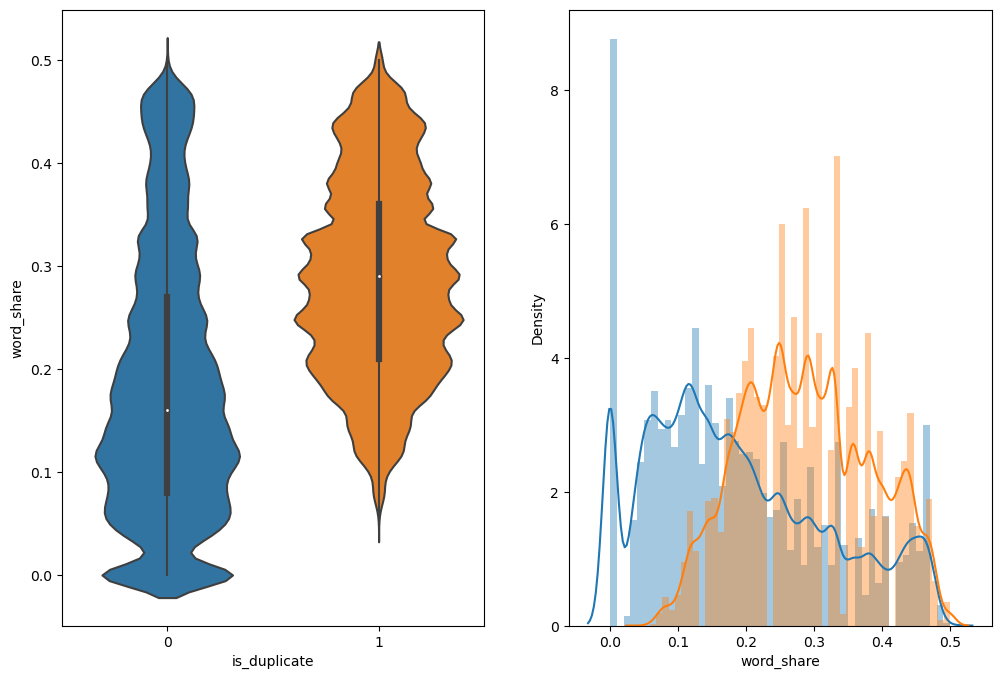

In [18]:
#feature words share

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate', y='word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_share'], label = 'non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_share'], label = 'duplicate')
plt.show()


Imp feature as the distributions are different

/tmp/ipykernel_23/2429630818.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['word_common'], label = 'non_duplicate')
/tmp/ipykernel_23/2429630818.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['word_common'], label = 'duplicate')


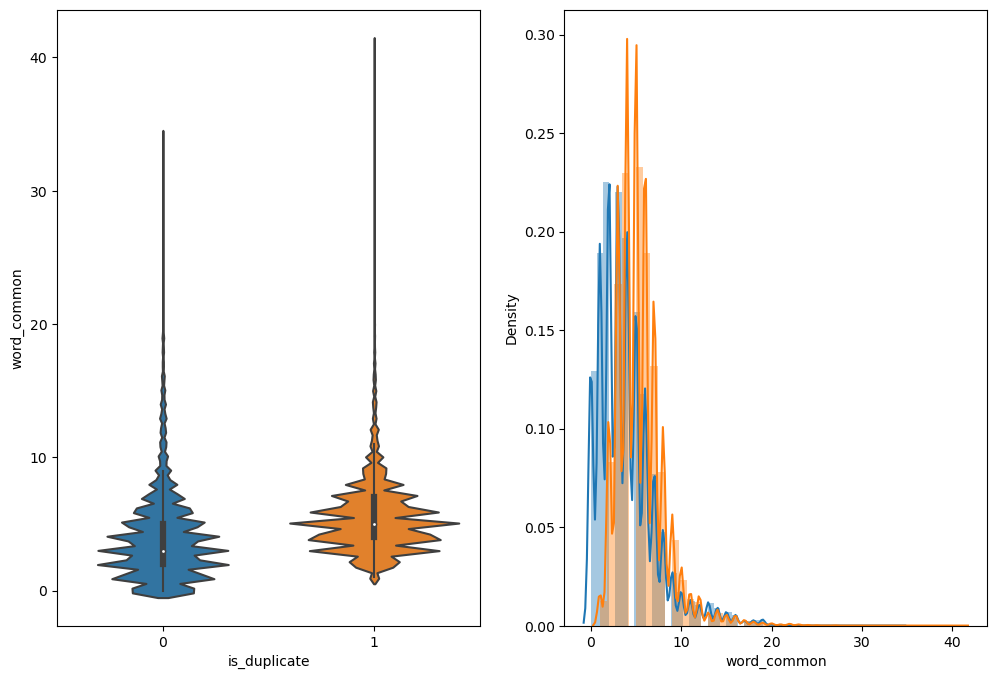

In [19]:
#feature words common

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate', y='word_common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==0]['word_common'], label = 'non_duplicate')
sns.distplot(df[df['is_duplicate']==1]['word_common'], label = 'duplicate')
plt.show()

Not so important feature

***Preprocessing of Text***

- Remove html tags  (quora contains htms tags as well)
- remove punctuation
- preform stemming
- remove stop words
- expanding contractions

In [20]:
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

def preprocess(x):
    x = str(x).lower().strip()
    
    # Replace certial special chars with their string equivalents
    x = x.replace('%', ' percent').replace('$',' dollar').replace(',000,000','m').replace(',000','k').replace("won't", 'will not').replace('cannot', 'can not').replace("n't", ' not').replace("what's", 'what is').replace("'ve",' have').replace("he's", 'he is').replace("she's",'she is').replace("'ll", ' will')
    
    x = re.sub(r'([0-9]+)000000000' , r'\1b', x)
    x = re.sub(r'([0-9]+)000000' , r'\1m', x)
    x = re.sub(r'([0-9]+)000' , r'\1k', x)

    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        x = BeautifulSoup(x)
        x = x.get_text()
        
    pattern = re.compile('\W')
    
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ',x).strip()
    
    
    return x
    

In [21]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

***Advance Feature Extraction***

- tokens = set of unique words in a sentence
- stop words = nlp stop words
- word = token which is not a stop word


Token Based
- cwc_min = common_word_count/min(len(q1_words),len(q2_words))
- cwc-max = common_word_count/max(len(q1_words),len(q2_words))
- csc_min = common_stop_count/min(len(q1_stops),len(q2_stops))
- csc-max = common_stop_count/max(len(q1_stops),len(q2_stops))
- ctc_min = common_token_count/min(len(q1_tokens),len(q2_tokens))
- ctc-max = common_token_count/max(len(q1_tokens),len(q2_tokens))
- last_word_eq = int(q1_token[-1] == q2_token[-1])
- first_word_eq = int(q1_token[0] == q2_token[0])

Length Based

- mean_len = (len(q1_tokens) + len(q2_tokens)) / 2
- abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
- longest_substr_ratio : len(longest_common_substr) / min(len(q1_tokens),len(q2_tokens))

***fuzzywuzzy***

gives value b/w 0-100 
0 - dissimilar
100 - similar

- fuzz_ratio : checks the edit distance between 2 strings [minimum no. of add/delete/insert operations required to make strings equals]
    
    issue 1) yankees, newyork yankees = 60 [newyork needs to be added sp low score but both are same teams]
          2) Newyork mets, Newyork Yankees = 75 , edit distance is less so high score but both are different teams
          
- fuzz_partial_ratio : checks if any partial substring matches completely or not [longer the substring higher the value]
    
    issue : newyork vs atlanta , atlanta vs newyork will give low score
    
- token_sort_ratio : take all the tokens, sort them and them compare
    
    issue : s1 = mariners vs angels
            s2 = los angeles angels of anaheim seattle mariners 
            It will not give very high score as s2 is long with extra tokens
         
- token_set_ratio : apply token sort , so s1 = angels mariners vs , s2 = anaheim angeles angels los mariners of seattle
    
    now t0 = [sorted intersection]
        t1 = [sorted_intersection] + [sorted rest of s1]
        t2 = [sorted_intersection] + [sorted rest of s2]
        
    and then compare each pair and take the max fuzz value among all 

    issue : s1 = sirhan, sirhan   s2 = sirhan   : value is 100, so repetitive words have issues




In [22]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [23]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)
df.head()

/tmp/ipykernel_23/1614884235.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,14,12,10.0,23.0,0.43,2,0
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,8,13,4.0,20.0,0.20,5,3
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,14,10,4.0,24.0,0.17,2,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,11,9,0.0,19.0,0.00,2,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,13,7,2.0,20.0,0.10,4,2


In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    STOP_WORDS = stopwords.words('english')
    
    token_features = [0.0]*8
    
    # extracting tokens
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #extracting stop words
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    #extracting words
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    common_word_count = len(q1_words.intersection(q2_words))
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    token_features[0] = common_word_count/(min(len(q1_words) , len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words) , len(q2_words)) + SAFE_DIV)
    
    token_features[2] = common_stop_count/(min(len(q1_stops) , len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops) , len(q2_stops)) + SAFE_DIV)
    
    token_features[4] = common_token_count/(min(len(q1_tokens) , len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count/(max(len(q1_tokens) , len(q2_tokens)) + SAFE_DIV)
    
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [27]:
token_features = df.apply(fetch_token_features , axis=1)

df['cwc_min'] = list(map(lambda x : x[0], token_features))
df['cwc_max'] = list(map(lambda x : x[1], token_features))
df['csc_min'] = list(map(lambda x : x[2], token_features))
df['csc_max'] = list(map(lambda x : x[3], token_features))
df['ctc_min'] = list(map(lambda x : x[4], token_features))
df['ctc_max'] = list(map(lambda x : x[5], token_features))
df['last_word_eq'] = list(map(lambda x : x[6], token_features))
df['first_word_eq'] = list(map(lambda x : x[7], token_features))

In [28]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,freq_q1+q2,freq_q1-q2,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0,1
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,5,3,0.833319,0.454541,0.749981,0.599988,0.666661,0.470585,0,1
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0,1
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,2,0,0.249994,0.142855,0.000000,0.000000,0.083333,0.055555,0,0
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,4,2,0.399992,0.181817,0.999950,0.666644,0.571420,0.266665,0,1


In [29]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16275 sha256=89711a27b86455f4e5fb75c8aca4cb63f0d978188d93b4dca1e69e80da99724c
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [30]:
import distance
def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # extracting tokens
    q1_tokens = q1.split(" ")
    q2_tokens = q2.split(" ")
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    if len(strs)>0:
        length_features[2] = len(strs[0]) / min(len(q1_tokens), len(q2_tokens))
    else:
        length_features[2] = 0.0
    
    return length_features

In [31]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [32]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.833319,0.999983,0.999983,0.916659,0.785709,0,1,2,13.0,4.666667
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.454541,0.749981,0.599988,0.666661,0.470585,0,1,5,14.5,2.500000
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.333328,0.399992,0.249997,0.399996,0.285712,0,1,4,12.0,1.000000
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.142855,0.000000,0.000000,0.083333,0.055555,0,0,6,15.0,0.166667
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.181817,0.999950,0.666644,0.571420,0.266665,0,1,8,11.0,0.857143


In [33]:
!pip install fuzzywuzzy

In [34]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    fuzzy_features[0] = fuzz.QRatio(q1, q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)
    
    return fuzzy_features

In [35]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [36]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,1,1,66,57,...,0.785709,0,1,2,13.0,4.666667,93,100,93,100
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,4,1,51,88,...,0.470585,0,1,5,14.5,2.500000,66,74,63,86
2,2,5,6,how can i increase the speed of my internet connection while using a vpn,how can internet speed be increased by hacking through dns,0,1,1,73,59,...,0.285712,0,1,4,12.0,1.000000,54,53,66,66
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math 23 24 math is divided by 24 23,0,1,1,50,65,...,0.055555,0,0,6,15.0,0.166667,35,39,36,36
4,4,9,10,which one dissolve in water quikly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,3,1,76,39,...,0.266665,0,1,8,11.0,0.857143,46,55,47,67
